# Ultimate Tech Take Home Challenge

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import json

with open('ultimate_data_challenge.json') as f:
  data = json.load(f)

# Output: {'name': 'Bob', 'languages': ['English', 'Fench']}
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
# load data and add column to sum logins
df = pd.read_json('logins.json')
df.set_index('login_time', inplace=True)
df['logins'] = 1
df

,logins
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1
...,...
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   logins  93142 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


In [7]:
# resample to get in 15 min intervals
df = df.resample('15T').sum()
df

,logins
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [31]:
# most popular hours of day to ride
df2 = df.groupby(df.index.map(lambda t: t.hour))[['logins']].sum()
df2.sort_values(by='logins', ascending=False, inplace=True)
print(df2)
print(type(df2))



            logins
login_time        
22            6607
1             6317
23            6058
0             5993
2             5800
11            5799
21            5623
4             5034
12            4964
3             4831
20            4103
13            3611
14            3426
19            3235
10            3064
15            3038
18            2980
5             2945
16            2832
17            2584
9             1527
6             1138
8              818
7              815
<class 'pandas.core.frame.DataFrame'>


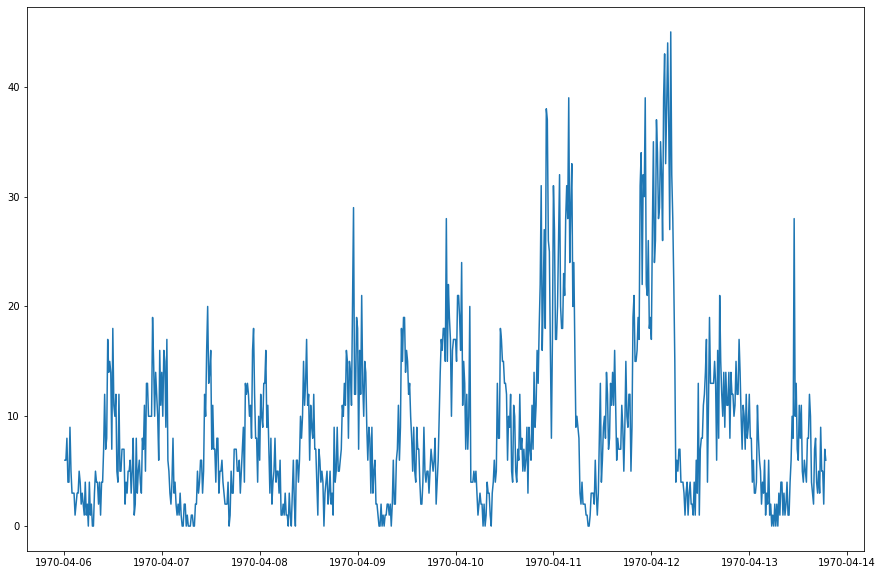

In [20]:
# plotting to characterize the underlying patterns of the demand
dftest = df[df.index > '1970-04-6']

plt.figure(figsize=(15,10))
plt.plot(dftest)
plt.show()